In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Rename the 'Genre' column to 'Gender'
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# to get count of rows and columns in dataset
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

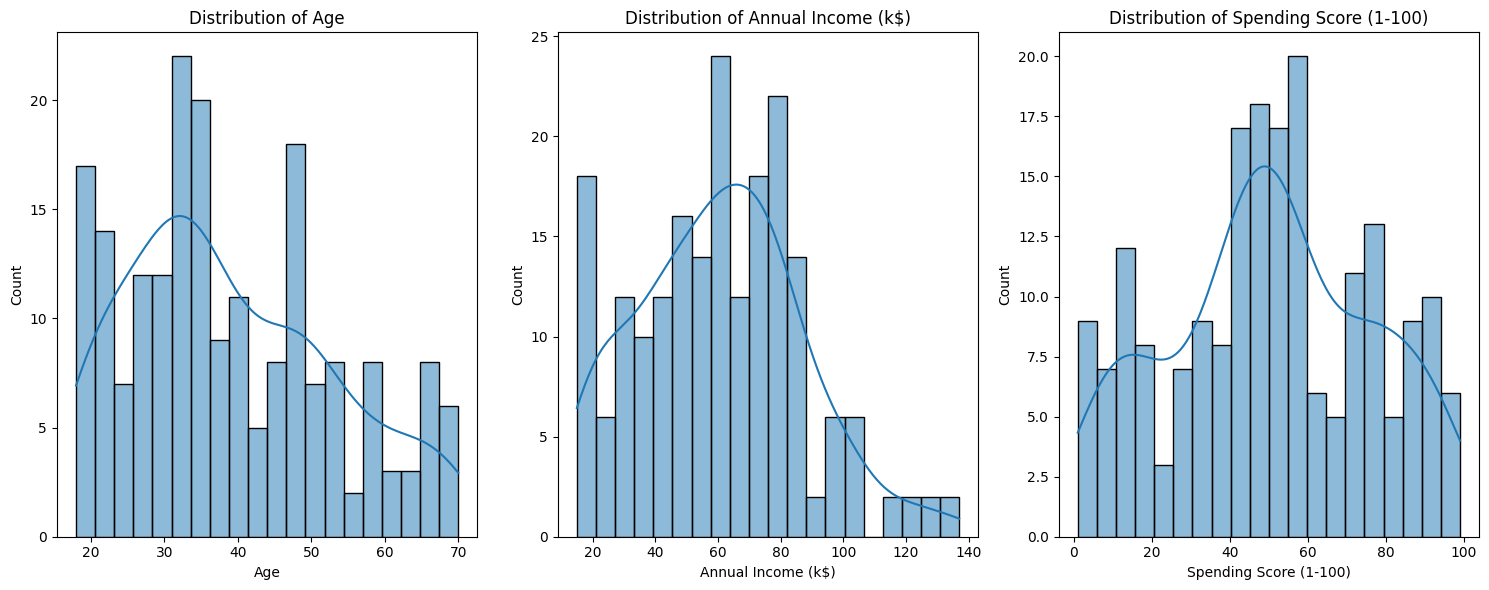

In [9]:
# Visualizations for Age, Annual Income, and Spending Score
plt.figure(figsize=(15, 6))
for i, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

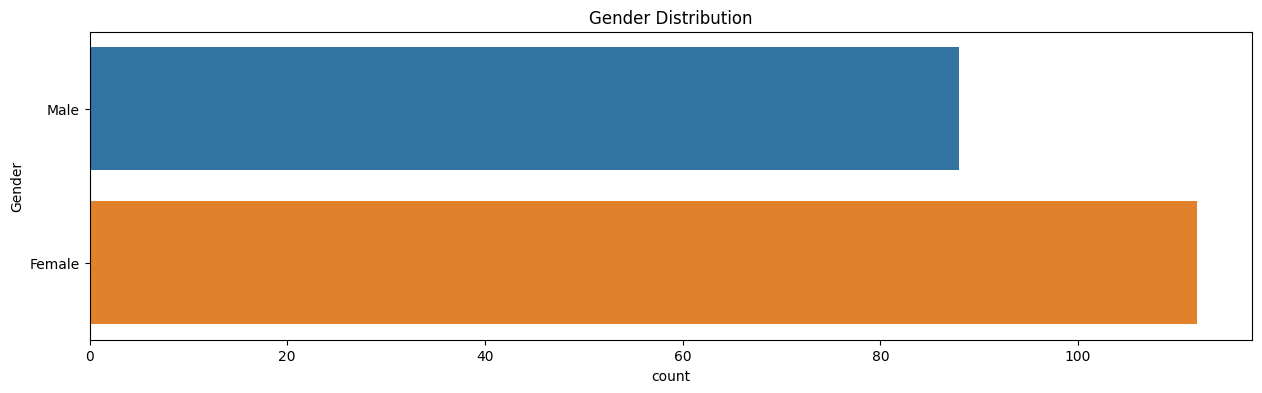

In [10]:
# Count plot for Gender distribution
plt.figure(figsize=(15, 4))
sns.countplot(y='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

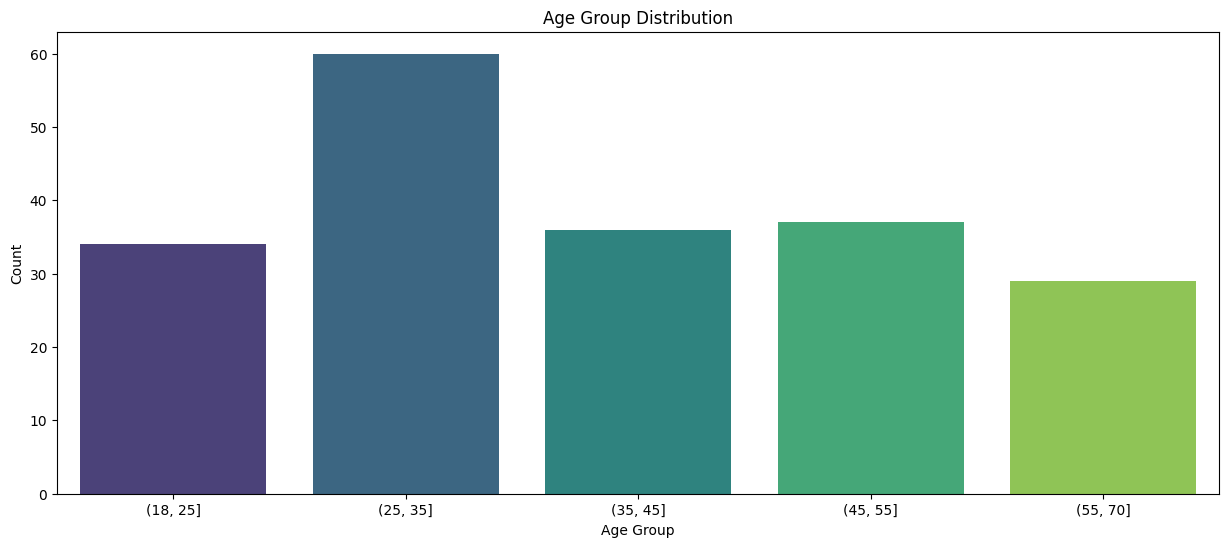

In [11]:
# Age groups distribution
age_bins = [18, 25, 35, 45, 55, 70]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins)
plt.figure(figsize=(15, 6))
sns.countplot(x='Age Group', data=df, palette='viridis')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

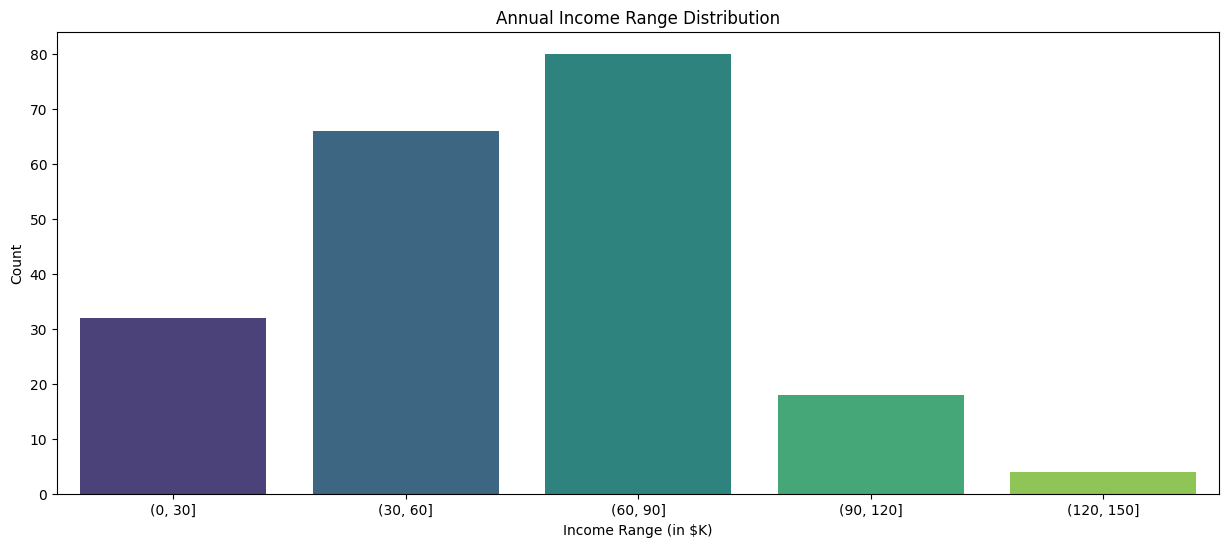

In [12]:
# Annual income ranges
income_bins = [0, 30, 60, 90, 120, 150]
df['Income Range'] = pd.cut(df['Annual Income (k$)'], bins=income_bins)
plt.figure(figsize=(15, 6))
sns.countplot(x='Income Range', data=df, palette='viridis')
plt.title('Annual Income Range Distribution')
plt.xlabel('Income Range (in $K)')
plt.ylabel('Count')
plt.show()

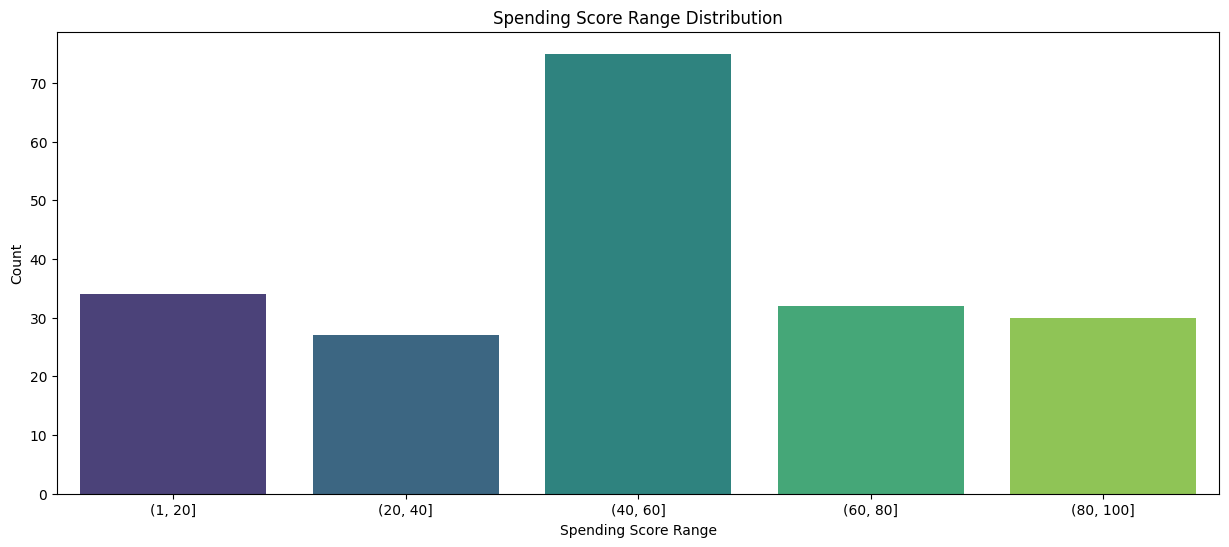

In [13]:
# Spending score ranges
score_bins = [1, 20, 40, 60, 80, 100]
df['Score Range'] = pd.cut(df['Spending Score (1-100)'], bins=score_bins)
plt.figure(figsize=(15, 6))
sns.countplot(x='Score Range', data=df, palette='viridis')
plt.title('Spending Score Range Distribution')
plt.xlabel('Spending Score Range')
plt.ylabel('Count')
plt.show()

c:\Users\aishwarya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\aishwarya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\aishwarya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\aishwarya\AppData\Local\Programs\Python\Python311\Lib\site-packa

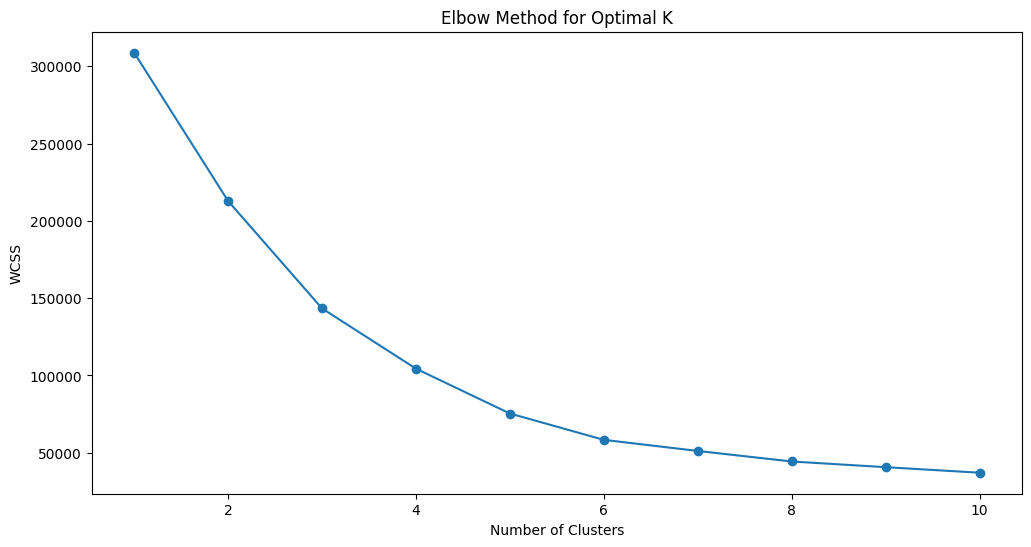

In [14]:
# Optimal number of clusters (Elbow Method)
from sklearn.cluster import KMeans
wcss = []
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

c:\Users\aishwarya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


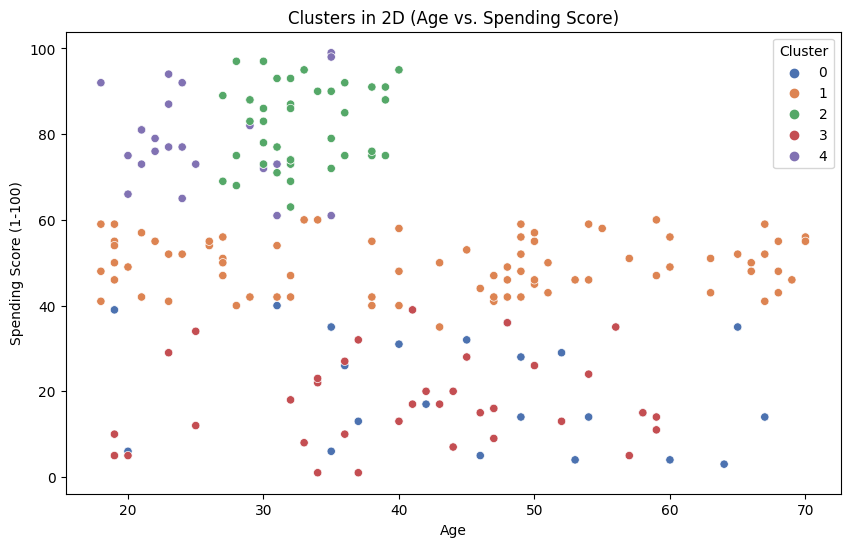

In [16]:
# K-means clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features)
df['Cluster'] = clusters


# Visualize clusters in 2D space (Age vs. Spending Score)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Cluster', palette='deep')
plt.title('Clusters in 2D (Age vs. Spending Score)')
plt.show()

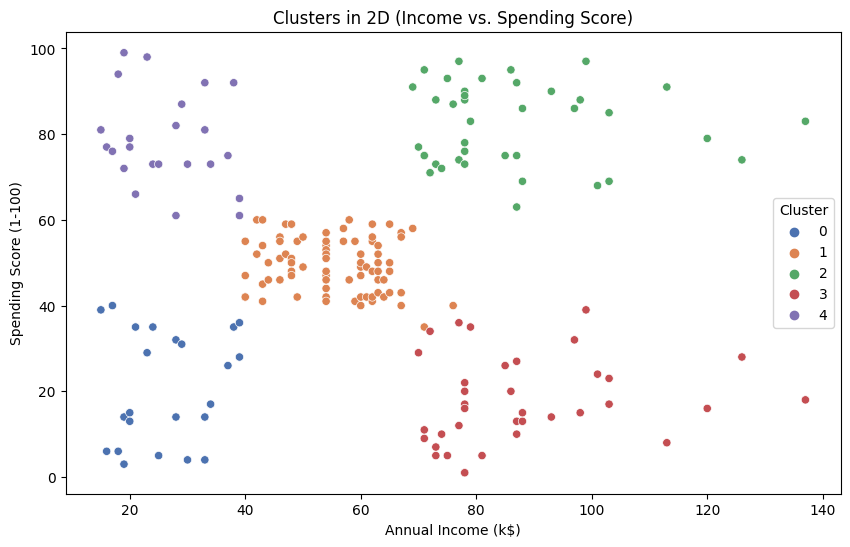

In [17]:
# Visualize clusters in 2D space (Annual Income vs. Spending Score)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster', palette='deep')
plt.title('Clusters in 2D (Income vs. Spending Score)')
plt.show()

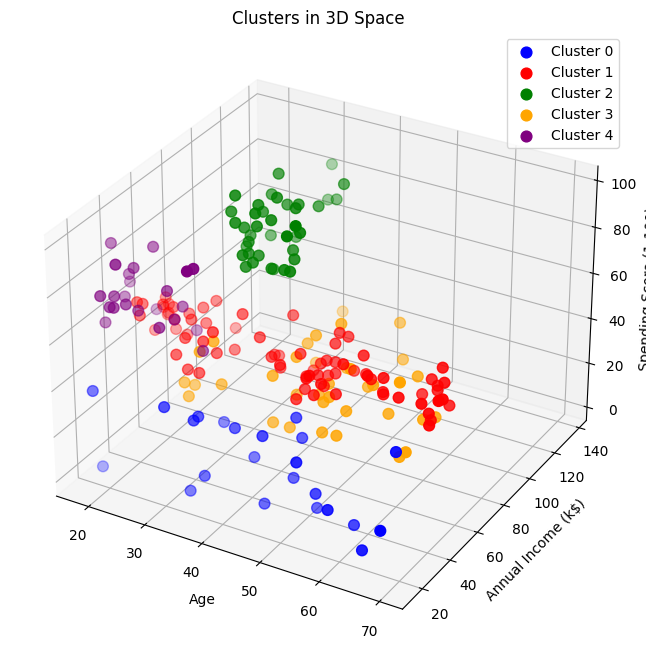

In [18]:
# Visualize clusters in 3D space
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i in range(5):
    cluster_points = df[df['Cluster'] == i]
    ax.scatter(cluster_points['Age'], cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'], c=colors[i], s=60, label=f'Cluster {i}')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Clusters in 3D Space')
plt.legend()
plt.show()